In [5]:
install.packages('readr')


  There is a binary version available but the source version is later:
      binary source needs_compilation
readr  2.1.3  2.1.4              TRUE

  Binaries will be installed
package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\manug\anaconda3\envs\renv\Lib\R\library\00LOCK\readr\libs\x64\readr.dll  a C:\Users\manug\anaconda3\envs\renv\Lib\R\library\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"



The downloaded binary packages are in
	C:\Users\manug\AppData\Local\Temp\RtmpicmY8u\downloaded_packages


In [6]:
library(readr)
ruta_excel = "C:\\Users\\manug\\OneDrive\\Escritorio\\Mates\\CUARTO\\SEGUNDO CUATRI\\DATOS 2\\AAII_2022-main\\trabajo_tema1\\hotel_reservations.csv"
gapminder = read_csv(ruta_excel)

Rows: 36275 Columns: 19
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (5): Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_...
dbl (14): no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nig...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head(gapminder)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [8]:
tail(gapminder)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [9]:
names(gapminder)

[1] "Booking_ID"                          
 [2] "no_of_adults"                        
 [3] "no_of_children"                      
 [4] "no_of_weekend_nights"                
 [5] "no_of_week_nights"                   
 [6] "type_of_meal_plan"                   
 [7] "required_car_parking_space"          
 [8] "room_type_reserved"                  
 [9] "lead_time"                           
[10] "arrival_year"                        
[11] "arrival_month"                       
[12] "arrival_date"                        
[13] "market_segment_type"                 
[14] "repeated_guest"                      
[15] "no_of_previous_cancellations"        
[16] "no_of_previous_bookings_not_canceled"
[17] "avg_price_per_room"                  
[18] "no_of_special_requests"              
[19] "booking_status"

In [9]:
summary(gapminder)

  Booking_ID         no_of_adults   no_of_children    no_of_weekend_nights
 Length:36275       Min.   :0.000   Min.   : 0.0000   Min.   :0.0000      
 Class :character   1st Qu.:2.000   1st Qu.: 0.0000   1st Qu.:0.0000      
 Mode  :character   Median :2.000   Median : 0.0000   Median :1.0000      
                    Mean   :1.845   Mean   : 0.1053   Mean   :0.8107      
                    3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.:2.0000      
                    Max.   :4.000   Max.   :10.0000   Max.   :7.0000      
 no_of_week_nights type_of_meal_plan  required_car_parking_space
 Min.   : 0.000    Length:36275       Min.   :0.00000           
 1st Qu.: 1.000    Class :character   1st Qu.:0.00000           
 Median : 2.000    Mode  :character   Median :0.00000           
 Mean   : 2.204                       Mean   :0.03099           
 3rd Qu.: 3.000                       3rd Qu.:0.00000           
 Max.   :17.000                       Max.   :1.00000           
 room_type_reserved 

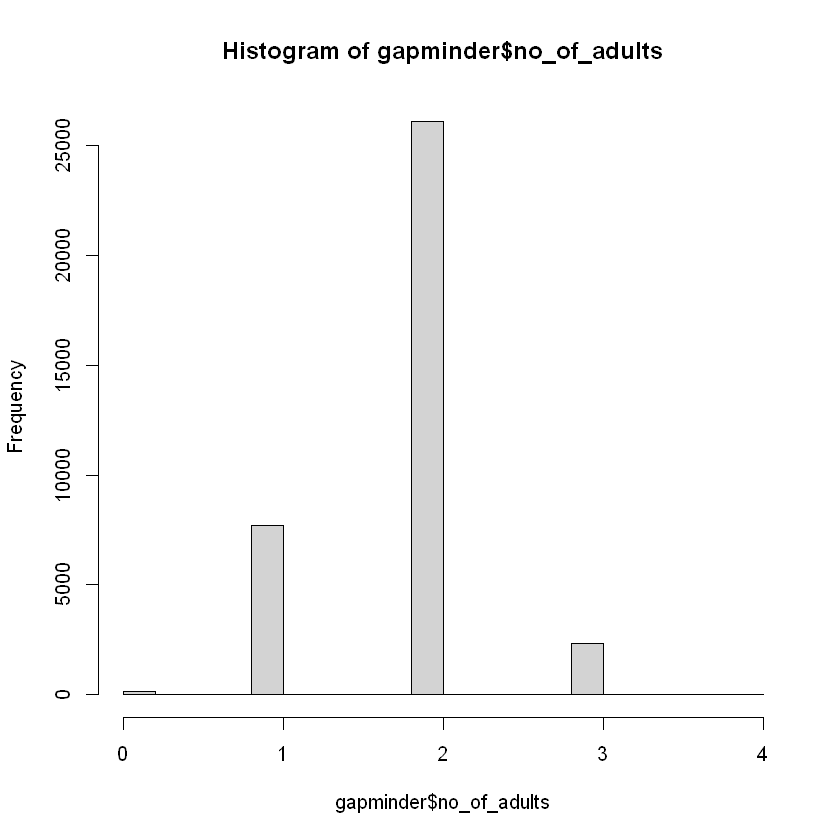

In [10]:
hist(gapminder$no_of_adults)